# Polynomial Regression

## Objectives:

1. Understanding of interaction effect in linear regression

2. Understanding how to read residuals.

3. Creating higher order terms and interaction terms by using PolynomialFeatures from sklearn.

In [14]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
advertising = pd.read_csv('data/Advertising.csv', index_col = 0)

In [10]:
y = advertising.Sales

independent_variables = ['TV', 'Radio']
X = advertising[independent_variables]

Let's make sure that everything is as expected.

In [21]:
display(X.head(3), y.head(3))


,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9


1    22.1
2    10.4
3     9.3
Name: Sales, dtype: float64

__Your Turn__

- Use statsmodels.api to fit a linear regression model to this data.

In [205]:
# %load -r 1-9 supplement.py


__Your Turn__

- Find y_predict (your predictions for the cities based on the model we fitted)

__Your Turn__

- Find residuals (The amount of error in your prediction for each city. Recall that the true values are in y)

## Residual Plot

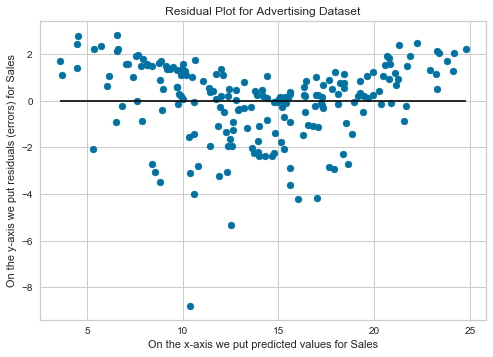

In [35]:
plt.scatter(y_predict, residuals)
plt.hlines(y = 0, xmin = y_predict.min(), xmax = y_predict.max())
plt.title('Residual Plot for Advertising Dataset')
plt.xlabel('On the x-axis we put predicted values for Sales')
plt.ylabel('On the y-axis we put residuals (errors) for Sales')
plt.show()

### Linear Regression on Advertising Dataset - Visualization

<img src = 'images/interaction.png' width = 550>

Img Source: ISLR, p81

## Adding Interaction Terms to the Model

In [36]:
## Sklearn has PolynomialFeatures class for creating higher order terms in the data
from sklearn.preprocessing import PolynomialFeatures

Recall that when we imported the class PolynomialFeatures, we should instantiate it to be able to use it. 

__Important parameters__

- Degree: Degrees of polynomials to be created. In our case we have $X_{1} = \text{TV}$ and $X_{2} = \text{Radio}$ 

if degree=2:

$$X_{1}^{2}, X_{1}  X_{2},X_{2}^{2}$$ columns will be created.

if degree=3:

$$X_{1}^{2}, X_{1}^{3}, X_{1}X_{2}, X_{1}^{2}X_{2}, X_{1}X_{2}^{2}, X_{2}^{2}, X_{2}^{3}$$


- Interaction only: It only adds interaction terms between the variables: 


$$ X_{1}X_{2} $$


Now, to understand the effect of PolynomialFeatures let's work with the columns ['TV', 'Radio' 'Newspaper]. Later on for the final model we will exclude 'Newspaper'.

In [130]:
columns = ['TV', 'Radio', 'Newspaper']

In [163]:
## Instantiate the PolynomialFeatures with some degree = 2
polynomial_features = PolynomialFeatures(degree = 2, interaction_only= False, include_bias= True )

In [164]:
polynomial_dataset_np = polynomial_features.fit_transform(advertising[columns])

In [165]:
## polynomial_features has a method that creates column names
polynomial_columns = polynomial_features.get_feature_names(input_features= columns)

In [166]:
polynomial_df = pd.DataFrame(polynomial_dataset_np, columns= polynomial_columns, index=y.index )

In [167]:
polynomial_df.head(3)

,1,TV,Radio,Newspaper,TV^2,TV Radio,TV Newspaper,Radio^2,Radio Newspaper,Newspaper^2,...,Radio^9 Newspaper,Radio^8 Newspaper^2,Radio^7 Newspaper^3,Radio^6 Newspaper^4,Radio^5 Newspaper^5,Radio^4 Newspaper^6,Radio^3 Newspaper^7,Radio^2 Newspaper^8,Radio Newspaper^9,Newspaper^10
1,1.0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,...,1.090266e+16,1.995936e+16,3.653936e+16,6.689215e+16,1.224587e+17,2.241836e+17,4.104101e+17,7.513328e+17,1.375456e+18,2.518030e+18
2,1.0,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,...,1.008578e+16,1.157427e+16,1.328243e+16,1.524268e+16,1.749224e+16,2.007379e+16,2.303634e+16,2.643610e+16,3.033761e+16,3.481492e+16
3,1.0,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,...,6.266823e+16,9.461673e+16,1.428527e+17,2.156796e+17,3.256339e+17,4.916433e+17,7.422850e+17,1.120705e+18,1.692045e+18,2.554656e+18


__Your Turn__

- Change the parameters and understand the effect of the parameters.

1. make degree =3. How many columns added?

2. set degree = 3 and interaction_only = True. How many columns now? What happened?

3. Set degree = 10, how many columns do you have?



## Fitting a Linear Regression Model with Polynomial Features

Now let's use degree =2 and interaction_only = True and see whether this improves our model.

In [169]:
## We will be using only TV and Radio again
independent_variables


['TV', 'Radio']

In [194]:
polynomial_features = PolynomialFeatures(degree = 2, interaction_only= True, include_bias= True )

finaldataset_np = polynomial_features.fit_transform(advertising[independent_variables])

final_cols = polynomial_features.get_feature_names(input_features= independent_variables)
finaldataset_df = pd.DataFrame(finaldataset_np, columns= final_cols, index=y.index )

finaldataset_df.head(3)

,1,TV,Radio,TV Radio
1,1.0,230.1,37.8,8697.78
2,1.0,44.5,39.3,1748.85
3,1.0,17.2,45.9,789.48


In [195]:
model = sm.OLS(y, finaldataset_df, hasconst= True)

In [196]:
final_model_fitted = model.fit()

In [197]:
final_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          6.68e-146
Time:                        11:25:33   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residuals for the linear model with interactions

In [198]:
y_predict = final_model_fitted.predict(finaldataset_df)

In [199]:
residuals = y -y_predict

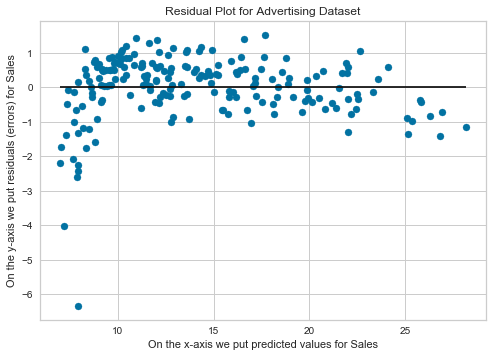

In [200]:
plt.scatter(y_predict, residuals)
plt.hlines(y = 0, xmin = y_predict.min(), xmax = y_predict.max())
plt.title('Residual Plot for Advertising Dataset')
plt.xlabel('On the x-axis we put predicted values for Sales')
plt.ylabel('On the y-axis we put residuals (errors) for Sales')
plt.show()

__Your Turn__

- We still see some pattern in the residuals.

- Create different datasets by changing the parameters in polynomial_features. 

- Can you improve this model?
